## Predictive Analysis of Market Trends to Predict Stock Price   

## Pre Processing Of Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer

In [2]:
def splitDate(df):
    X_date = []
    for d in df.index:
        d = str(d).split(' ')[0]
        x = []
        x.append(int(d.split('-')[0]))
        x.append(int(d.split('-')[1]))
        x.append(int(d.split('-')[2]))
        X_date.append(x)
    
    X_date = np.array(X_date,dtype=np.int64) 
    return [X_date[:,:1],X_date[:,1:2],X_date[:,2:3]]

In [3]:
#Function to read data from csv file and create a dataframe
def getDataSplitInTrainTest(fname,ftrends):
    #Read into dataframe
    df = pd.read_csv(fname,index_col='Date',
                     usecols=['Date','Open','Close','Volume'],
                     parse_dates=True,na_values=['nan'])
    
       
    
    df['Date'] = pd.to_datetime(df.index).astype(np.int64)
    df['Year'],df['Month'],df['Day'] = splitDate(df)
    
    df_trends = pd.read_csv(ftrends,index_col='Date',parse_dates=True)
        
    #Stat and End Date for train and test data respectivly
    #Train Data
    train_start_date = '2007-01-03'
    train_end_date = '2015-01-02'
    train_dates = pd.date_range(train_start_date,train_end_date)
    
    #Test Data
    test_start_date = '2015-01-05'    
    test_end_date = '2016-12-30'
    test_dates = pd.date_range(test_start_date,test_end_date)
    
    #Our dataframe wil have date as index and one column as open price
    df_train = pd.DataFrame(index=train_dates) 
    df_test = pd.DataFrame(index=test_dates) 

    #Join
    df_train = df_train.join(df)
    df_test = df_test.join(df)
    
    #drop nan
    df_train = df_train.dropna()
    df_test = df_test.dropna()
    
    #For trends value
    df_train1 = df_train.join(df_trends).dropna()
    df_test1 = df_test.join(df_trends).dropna()
    
    #Return df_train and df_train as a tuple
    return (df_train1,df_test1)
    
#Calling function to get processed data
df_train,df_test = getDataSplitInTrainTest('AAPL.csv','TRENDS.csv')

## Data Visualization

#### Train Data

In [4]:
#First Five samples
df_train.head()

,Open,Close,Volume,Date,Year,Month,Day,Trend
2007-01-03,12.327143,11.971429,309579900.0,1.167782e+18,2007.0,1.0,3.0,100.0
2007-01-04,12.007143,12.237143,211815100.0,1.167869e+18,2007.0,1.0,4.0,100.0
2007-01-05,12.252857,12.150000,208685400.0,1.167955e+18,2007.0,1.0,5.0,100.0
2007-01-08,12.280000,12.210000,199276700.0,1.168214e+18,2007.0,1.0,8.0,100.0
2007-01-09,12.350000,13.224286,837324600.0,1.168301e+18,2007.0,1.0,9.0,100.0


### Test Data

In [5]:
#First Five samples
df_test.head()

,Open,Close,Volume,Date,Year,Month,Day,Trend
2015-01-05,108.290001,106.250000,64285500.0,1.420416e+18,2015.0,1.0,5.0,52.0
2015-01-06,106.540001,106.260002,65797100.0,1.420502e+18,2015.0,1.0,6.0,52.0
2015-01-07,107.199997,107.750000,40105900.0,1.420589e+18,2015.0,1.0,7.0,52.0
2015-01-08,109.230003,111.889999,59364500.0,1.420675e+18,2015.0,1.0,8.0,52.0
2015-01-09,112.669998,112.010002,53699500.0,1.420762e+18,2015.0,1.0,9.0,52.0


### Plotting Graph

In [6]:
def plotDataframe(df,title):
    ax = df.plot(title=title,fontsize=10)
    ax.set_xlabel("Data")
    ax.set_ylabel("Price")
    plt.show()   

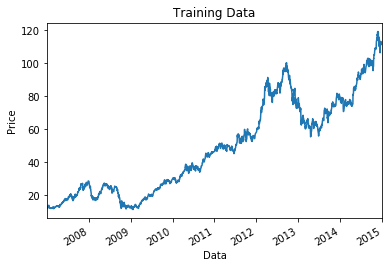

In [7]:
#Plot
plotDataframe(df_train['Open'],"Training Data")

## Splitting dataframe into features and target (X,y)

In [16]:
#Train
#X_train = np.asarray([pd.to_datetime(df_train.index).astype(np.int64),df_train['Trend']])
X_train = df_train[['Year','Month','Day']]
y_train = df_train['Close']

#test
#X_test = np.array([pd.to_datetime(df_test.index).astype(np.int64),df_test['Trend']])
X_test = df_test[['Year','Month','Day']]
y_test = df_test['Close']

# ML Algorithm

### Linear Regression

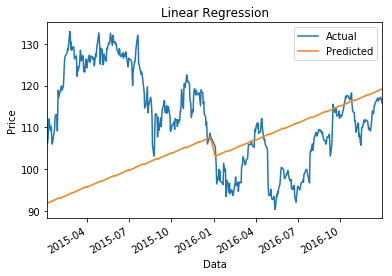

In [17]:
from sklearn.linear_model import LinearRegression
model_linear_reg = LinearRegression(normalize=True) 
model_linear_reg.fit(X_train,y_train)
df_linear_reg = pd.DataFrame(index=df_test.index)
df_linear_reg['Actual'] = y_test
df_linear_reg['Predicted'] = model_linear_reg.predict(X_test)
plotDataframe(df_linear_reg,"Linear Regression")

### Random Forest Regressor

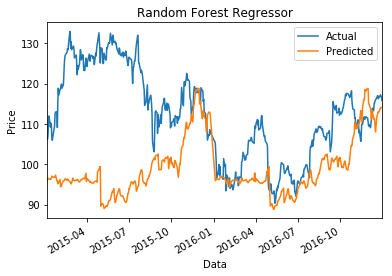

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model_rf.predict(X_test)
plotDataframe(df_rf,"Random Forest Regressor")

## SVR

In [14]:
from sklearn.svm import SVR

### SVR with Linear Kernel

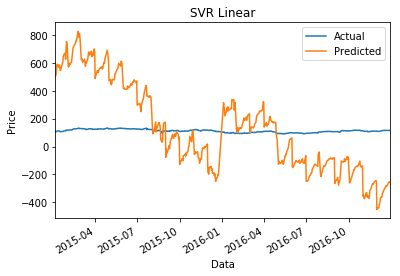

In [15]:
model_svr_linear = SVR(kernel= 'linear', C= 1e3)
model_svr_linear.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model_svr_linear.predict(X_test)
plotDataframe(df_rf,"SVR Linear")

### SVR with Poly Kernel

In [ ]:
model = SVR(kernel= 'poly')
model.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model.predict(X_test)
plotDataframe(df_rf,"SVR Poly")

### SVR Rbf

In [ ]:
model = SVR(kernel= 'rbf')
model.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model.predict(X_test)
plotDataframe(df_rf,"SVR Rbf")